In [208]:
!pip install mysql-connector-python

In [209]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",      
    user="root",   
    password="root",
    database="project" 
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [210]:
#create cursor object to execute sql queries
cursor = connection.cursor()
# Query the data from dataset
cursor.execute("SELECT * FROM dataset")
#After fetching data from the database we are storing it into Pandas DataFrame
dataset = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(dataset.head(5))

  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2    Grenoble-IsÃ¨re Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             YCO   

In [211]:
dataset.describe 

<bound method NDFrame.describe of     Passenger ID First Name Last Name  Gender  Age  Nationality  \
0         ABVWIg     Edithe    Leggis  Female   62        Japan   
1         jkXXAX     Elwood      Catt    Male   62    Nicaragua   
2         CdUz2g      Darby   Felgate    Male   67       Russia   
3         BRS38V   Dominica      Pyle  Female   71        China   
4         9kvTLo        Bay   Pencost    Male   21        China   
..           ...        ...       ...     ...  ...          ...   
121       iFQFjC   Bernardo   Bigland    Male   79  Philippines   
122       SyeYeN     Cymbre   Steeden  Female   55       Russia   
123       60NAQu    Leandra     Demer  Female    6     Colombia   
124       YeE54F     Shermy  Gatchell    Male   66     Colombia   
125       87HYfh       Bryn   Pratley  Female   56     Maldives   

                  Airport Name Airport Country Code  \
0             Coldfoot Airport                   US   
1            Kugluktuk Airport                   CA

In [212]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          126 non-null    object
 1   First Name            126 non-null    object
 2   Last Name             126 non-null    object
 3   Gender                126 non-null    object
 4   Age                   126 non-null    int64 
 5   Nationality           126 non-null    object
 6   Airport Name          126 non-null    object
 7   Airport Country Code  126 non-null    object
 8   Country Name          126 non-null    object
 9   Airport Continent     126 non-null    object
 10  Continents            126 non-null    object
 11  Departure Date        126 non-null    object
 12  Arrival Airport       126 non-null    object
 13  Pilot Name            126 non-null    object
 14  Flight Status         126 non-null    object
dtypes: int64(1), object(14)
memory usage: 14

In [213]:
dataset.shape # total number of rows and columns 

(126, 15)

In [214]:
print(dataset.isnull().sum())  # Count missing values per column

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


In [215]:
dataset.dropna(inplace=True)

In [216]:
dataset.dtypes

Passenger ID            object
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object

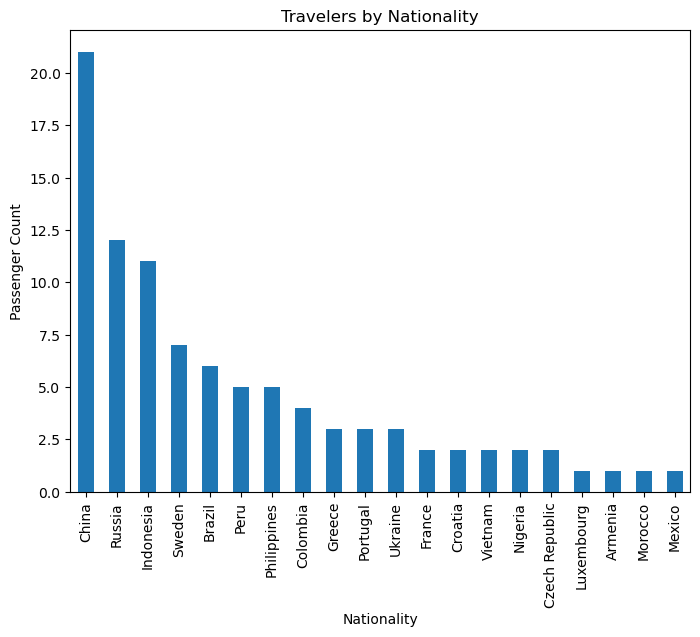

In [217]:
# what are the top Travelers Nationality?
nations = dataset['Nationality'].value_counts().nlargest(20)

plt.figure(figsize=(8, 6))
nations.plot(kind='bar')

plt.title('Travelers by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Passenger Count')

plt.show()

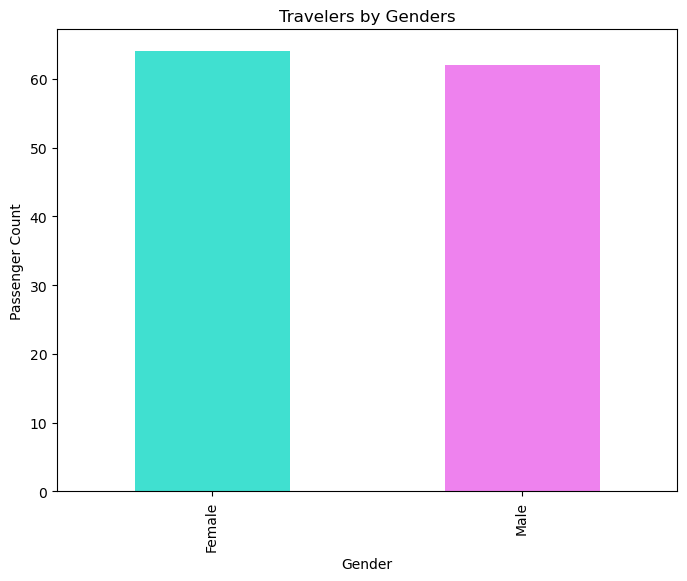

In [218]:
# Show the Travelers Distribution by genders?
import matplotlib.pyplot as plt

gender = dataset['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender.plot(kind='bar', color=['turquoise', 'violet'])

plt.title('Travelers by Genders')
plt.xlabel('Gender')
plt.ylabel('Passenger Count')

plt.show()

In [219]:
nums = [0, 15, 30, 50, 70, 120]  # Define the age groups
gap = ['0-15', '16-30', '31-50', '51-70', '71+']  # Define group names
dataset['ages'] = pd.cut(dataset['Age'], bins = nums, labels = gap)  # Create a new age group column

C:\Users\Sayali Shinde\AppData\Local\Temp\ipykernel_12628\2388193450.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = age_gaps.index, y = age_gaps.values, palette = "Spectral")


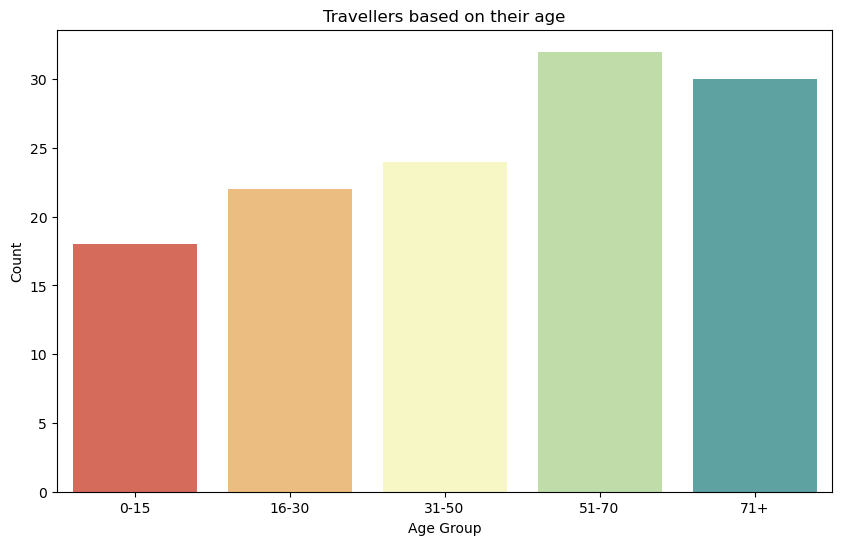

In [220]:
# Distribute the travelers Based on Their age group?
age = dataset['ages'].value_counts()

age_gaps = age.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x = age_gaps.index, y = age_gaps.values, palette = "Spectral")

plt.title("Travellers based on their age")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.show()

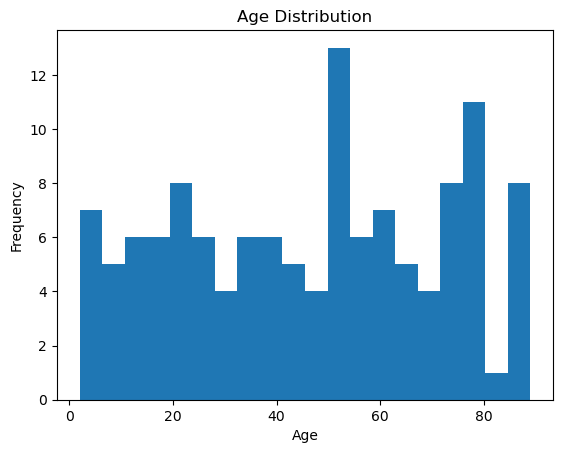

In [221]:
 #show the Age distribution of my dataset?
dataset['Age'].dropna().plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.show()

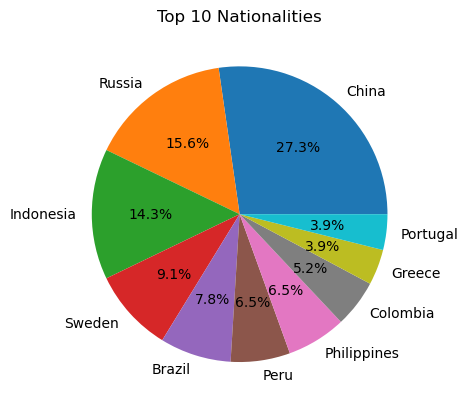

In [222]:
#  show top 10 Nationality distribution?
dataset['Nationality'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', title='Top 10 Nationalities')
plt.ylabel('')
plt.show()

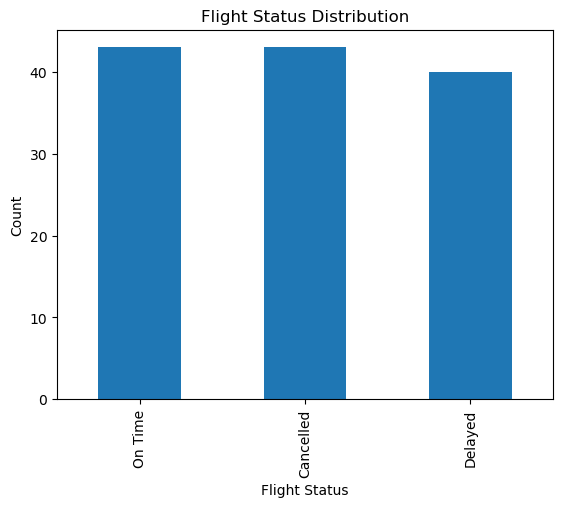

In [223]:

#  Count of flights by Flight Status?
dataset['Flight Status'].value_counts().plot(kind='bar', title='Flight Status Distribution')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()

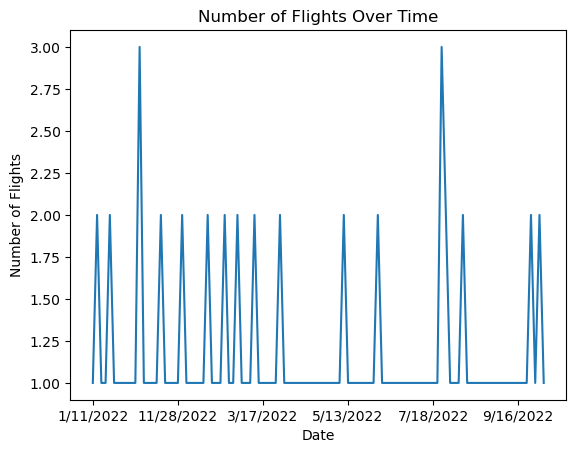

In [224]:
# Show the Number of flights over time date wise
dataset.groupby('Departure Date').size().plot(kind='line', title='Number of Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.show()

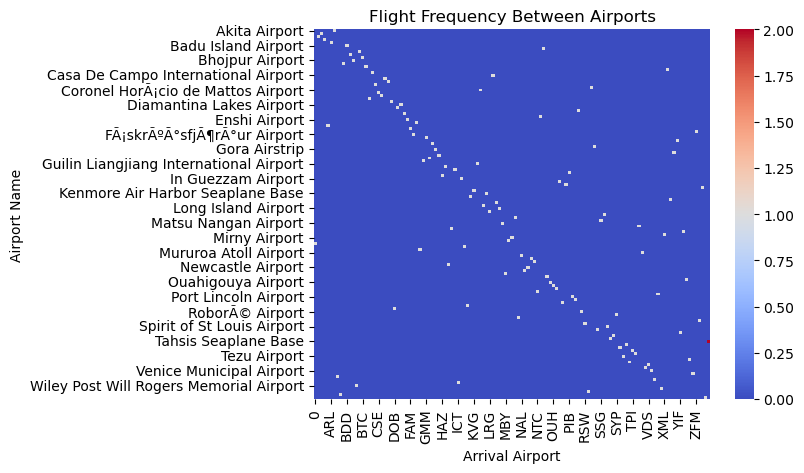

In [225]:
# Show the Flight frequency between Airport Name and Arrival Airport ?
pivot_table = dataset.pivot_table(index='Airport Name', columns='Arrival Airport', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Flight Frequency Between Airports')
plt.show()

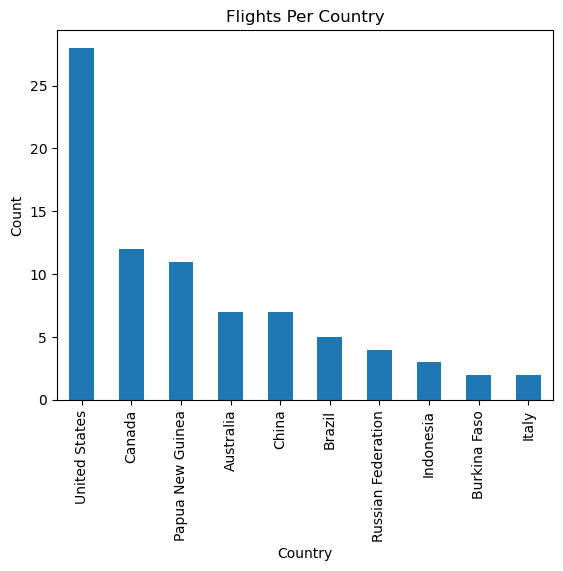

In [226]:

# Show the Number of flights per Country Name?
dataset['Country Name'].value_counts().head(10).plot(kind='bar', title='Flights Per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

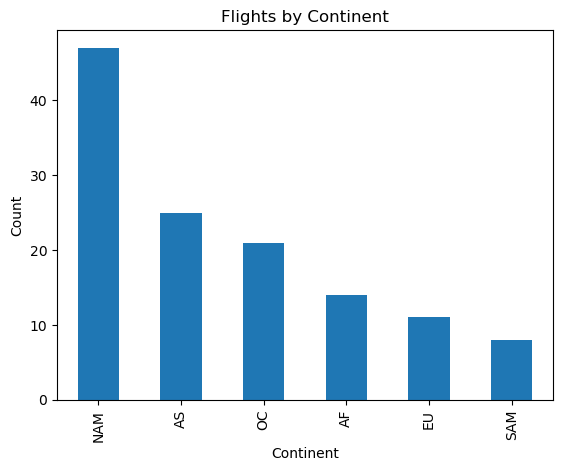

In [227]:
# Show the Distribution of flights by Airport Continent ?
dataset['Airport Continent'].value_counts().plot(kind='bar', title='Flights by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.show()

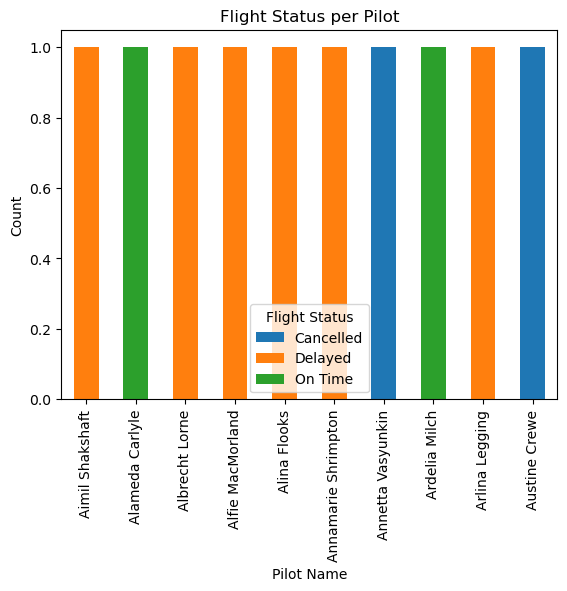

In [228]:
# Show the Flight status per pilot ?
status_pilot = pd.crosstab(dataset['Pilot Name'], dataset['Flight Status'])
status_pilot.head(10).plot(kind='bar', stacked=True, title='Flight Status per Pilot')
plt.xlabel('Pilot Name')
plt.ylabel('Count')
plt.show()

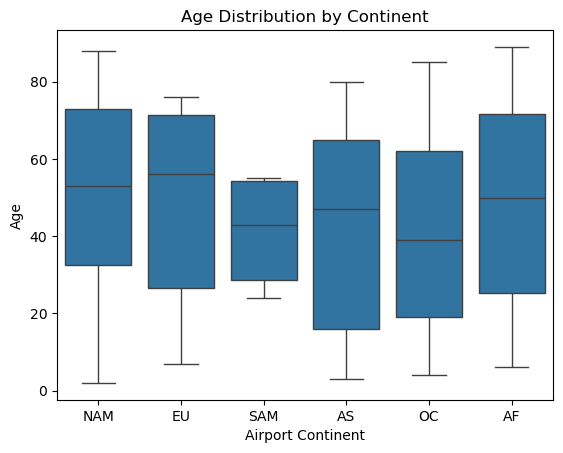

In [229]:
# Show the Age distribution across different continents?
sns.boxplot(x='Airport Continent', y='Age', data=dataset)
plt.title('Age Distribution by Continent')
plt.show()

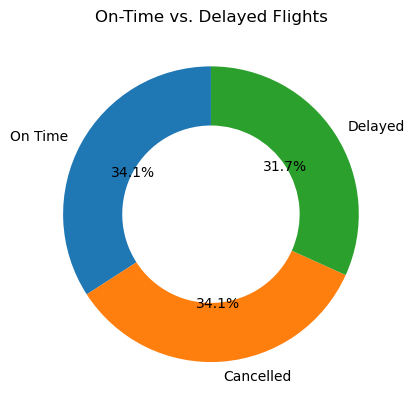

In [230]:
# Show Proportion of On-Time vs. Delayed flights?
flight_status_counts = airline_data['Flight Status'].value_counts()
plt.pie(flight_status_counts, labels=flight_status_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('On-Time vs. Delayed Flights')
plt.show()

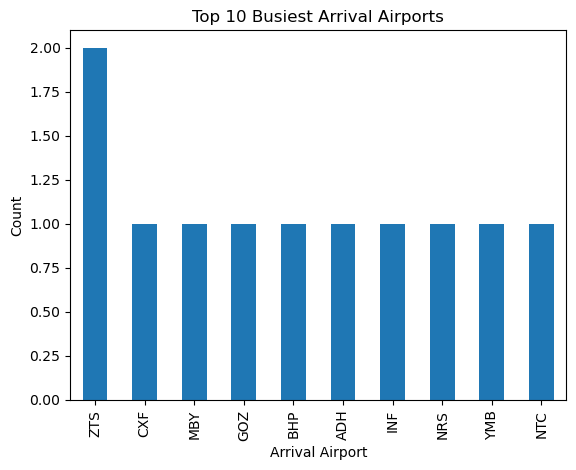

In [231]:
#  Show the Top 10 busiest arrival airports ?
dataset['Arrival Airport'].value_counts().head(10).plot(kind='bar', title='Top 10 Busiest Arrival Airports')
plt.xlabel('Arrival Airport')
plt.ylabel('Count')
plt.show()

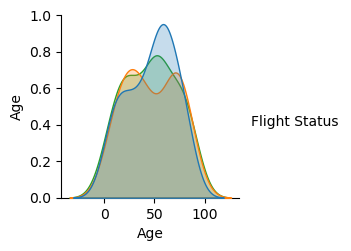

In [232]:
# Show the Relationships between Age, Nationality, and Flight Status?
sns.pairplot(airline_data[['Age', 'Nationality', 'Flight Status']].dropna(), hue='Flight Status')
plt.show()

#CONCLUSION


1. Passenger Demographics:
    The dataset reveals a balanced gender distribution, with slight variations depending on regions.
    The age distribution shows that the majority of travelers fall within the 25–45 age group, indicating active business and leisure travelers.
    Nationality insights highlight key markets, with top nationalities representing regions with strong travel demand.

2. Flight Performance Insights:
   Flight status analysis indicates that a significant portion of flights are on time, but delays are noticeable, especially with specific pilots and routes.
    Time-series analysis reveals peak travel periods, often coinciding with holidays and seasonal trends.

3. Airport Activity:
    The busiest airports handle a high volume of passengers, with some airports showing higher delays, potentially due to congestion.
    Geographical analysis identifies countries and continents with the highest flight activities, aiding in route optimization strategies.

4. Pilot Performance:
    Certain pilots handle more flights, and the correlation with flight delays provides insights into training and operational efficiency.
    Delayed flight trends associated with specific pilots could point to external factors like route difficulties or scheduling issues.

5. Trends & Recommendations:
    Monthly passenger trends show growth opportunities during off-peak seasons through marketing campaigns.
    Airports with high delays need operational reviews to improve efficiency.
    Airlines can focus on customer demographics to tailor services, such as age-specific amenities or nationality-based offerings.
